# Lab | Model generation, and validation

### Pre Steps from previous labs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
marketing_customer_df = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')
def clean_col_name (df: pd.DataFrame) -> pd.DataFrame:
    '''
    Function to apply naming convention to column names.
    Convert all names to lower case strings and replace empty spaces with "_".
    Renames st to state.
    
    Input: df: pd.DataFrame
    Output: New DataFrame with replaced values
    '''
    # make a safety copy
    df2= df.copy()
    
    # convert all to lower case names
    df2.columns = df2.columns.str.lower()
    
    # replacing " " with "_" in column names
    df2.columns = map(lambda x: x.replace(" ","_"), df2.columns)
    
    # to replace the column name "ST" (by now its "st") with "state" the rename() method is applied
    df2 = df2.rename(columns={'st':'state'})
    return df2

In [3]:
marketing_customer_df = clean_col_name(marketing_customer_df)

In [4]:
marketing_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [5]:
marketing_customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [6]:
marketing_customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Data Transformations

I keep a few steps from the previous lab but will not show everything again

In [7]:
numerical_df = marketing_customer_df.select_dtypes(include='number')
categorical_df = marketing_customer_df.select_dtypes(exclude='number')

In [8]:
numerical = marketing_customer_df.select_dtypes(include='number').columns
categoricals = marketing_customer_df.select_dtypes(exclude='number').columns
# checks:
#len(numerical) + len(categorical) == marketing_customer_df.dtypes.count()

- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical columns look symmetrical? Compute the skewness for each, and add a comment with your findings.

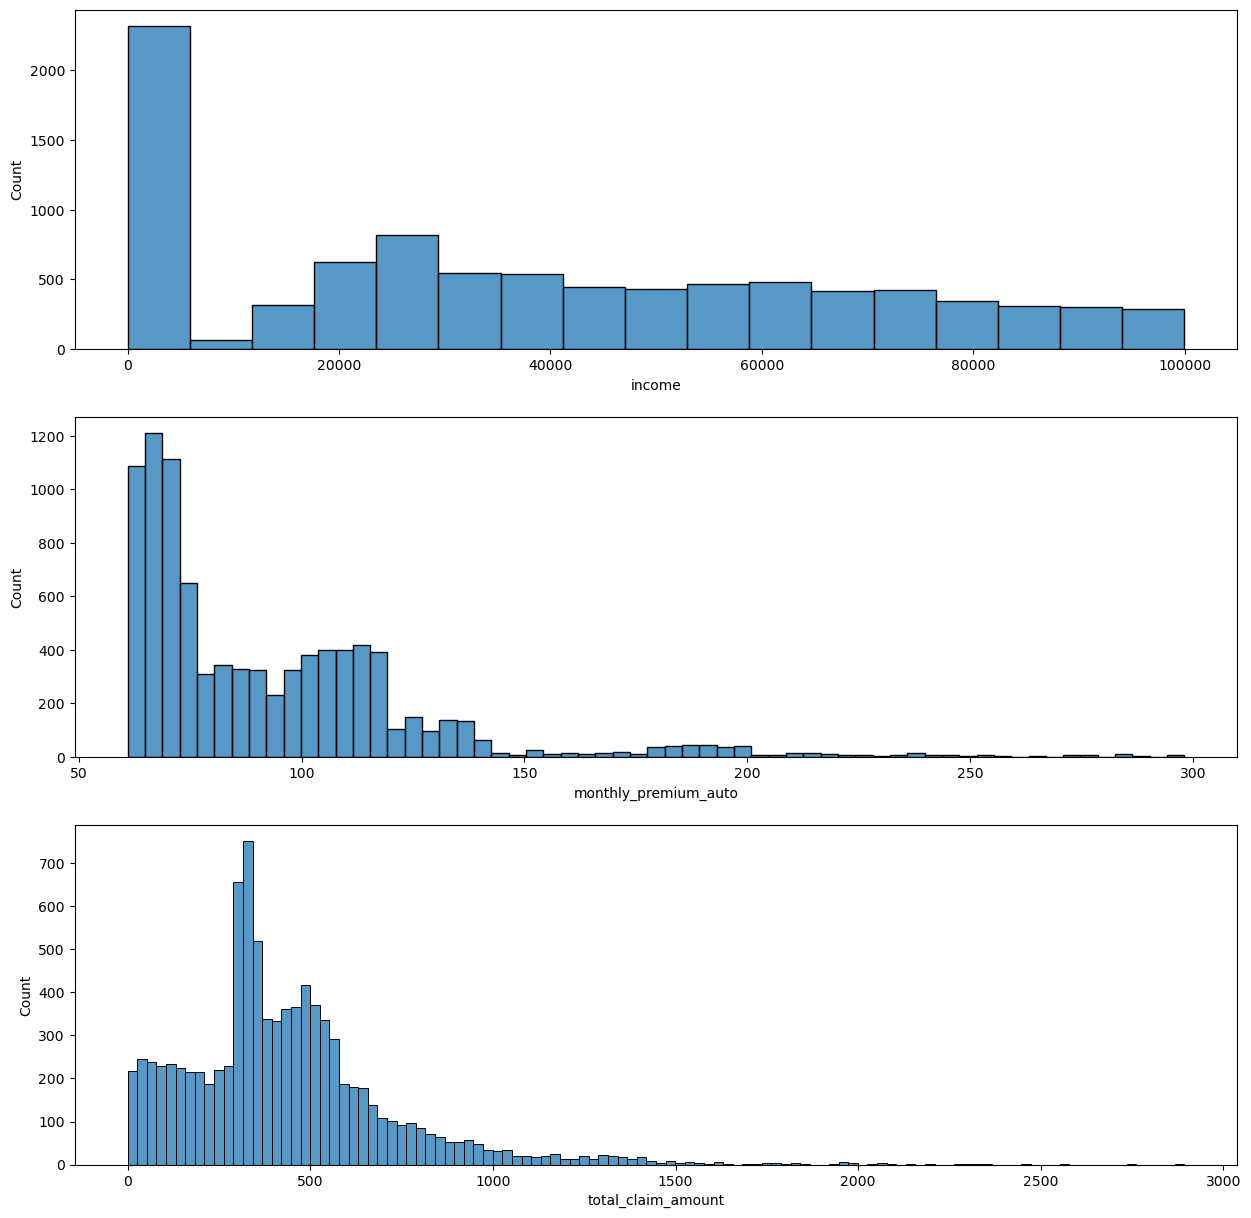

In [9]:
fig, ax = plt.subplots(3,1, figsize=(15,15))
sns.histplot(data = marketing_customer_df, x='income', ax=ax[0])
sns.histplot(data = marketing_customer_df, x='monthly_premium_auto', ax=ax[1])
sns.histplot(data = marketing_customer_df, x='total_claim_amount', ax=ax[2])
plt.show()

In [10]:
# Calculating the skew for all numerical variables. Check if it is outside range [-2,2].
skew_dict_outside_range = {'Variable_out':[], 'Skew':[]}
skew_dict_inside_range = {'Variable_in':[], 'Skew2':[]}
for i in range(len(numerical)):
    if marketing_customer_df[numerical[i]].skew() <= -2 or marketing_customer_df[numerical[i]].skew() >= 2:
        skew_dict_outside_range['Variable_out'].append(numerical[i])
        skew_dict_outside_range['Skew'].append(marketing_customer_df[numerical[i]].skew())
    else:
        skew_dict_inside_range['Variable_in'].append(numerical[i])
        skew_dict_inside_range['Skew2'].append(marketing_customer_df[numerical[i]].skew())
display(pd.DataFrame(skew_dict_outside_range))
display(pd.DataFrame(skew_dict_inside_range))

,Variable_out,Skew
0,customer_lifetime_value,3.032280
1,monthly_premium_auto,2.123546
2,number_of_open_complaints,2.783263


,Variable_in,Skew2
0,income,0.286887
1,months_since_last_claim,0.278586
2,months_since_policy_inception,0.040165
3,number_of_policies,1.253333
4,total_claim_amount,1.714966


- For the numerical variables, check the multicollinearity between the features. 
- Please note that we will use the column total_claim_amount later as the target variable.
- If you find a pair of columns that show a high correlation between them (greater than 0.9), drop the one that is less correlated with the column total_claim_amount. 
- Write code for both the correlation matrix. If there is no pair of features that have a high correlation, then do not drop any features.
Plot the heatmap of the correlation matrix after the filtering.

In [11]:
# Checking overall correlation between variables
correlation_matrix = numerical_df.corr().round(4)
correlation_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.0000,0.0244,0.3963,0.0115,0.0094,-0.0363,0.0220,0.2265
income,0.0244,1.0000,-0.0167,-0.0267,-0.0009,0.0064,-0.0087,-0.3553
monthly_premium_auto,0.3963,-0.0167,1.0000,0.0050,0.0203,-0.0131,-0.0112,0.6320
months_since_last_claim,0.0115,-0.0267,0.0050,1.0000,-0.0430,0.0054,0.0091,0.0076
months_since_policy_inception,0.0094,-0.0009,0.0203,-0.0430,1.0000,-0.0012,-0.0133,0.0033
number_of_open_complaints,-0.0363,0.0064,-0.0131,0.0054,-0.0012,1.0000,0.0015,-0.0142
number_of_policies,0.0220,-0.0087,-0.0112,0.0091,-0.0133,0.0015,1.0000,-0.0024
total_claim_amount,0.2265,-0.3553,0.6320,0.0076,0.0033,-0.0142,-0.0024,1.0000


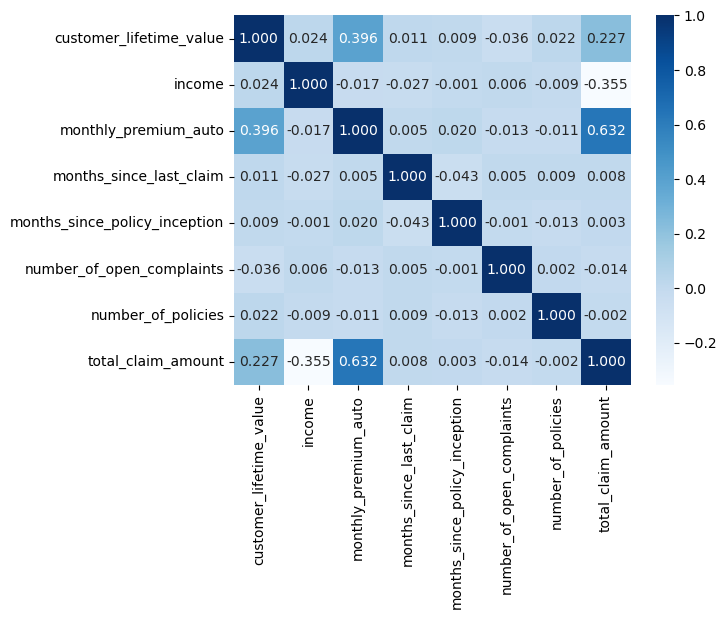

In [12]:
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.3f')
plt.show()

In [13]:
def significant_vars (df: pd.DataFrame, y: str, treshold=0.3):
    '''
    Checking all if any corr in the corrleation matrix exceed a given threshold.
    Gathers all that >= treshold or <= -treshold into a list.
    '''
    df2 = df.copy()
    corr_matrix = df2.corr()
    corr_with_y = corr_matrix.loc[:,y].reset_index()

    significant_corr = corr_with_y[(corr_with_y[y]>=treshold) | (corr_with_y[y]<=(-treshold))]
    significant_vars_list = list(significant_corr.iloc[:,0])
    significant_vars_list.remove(y)
    return significant_vars_list

In [14]:
# listing all variables that have a "significant" correlation with total_claim_amount:
selected_numerical = significant_vars(numerical_df, 'total_claim_amount')
selected_numerical

['income', 'monthly_premium_auto']

- I had to select a lower treshold as there were not so many variables coming closer to an adequate treshold of 0.7.
- I decided for (-)0.3 as this indicates at least a low positive or negative correlation.
- In case this results in a model with high errors, I will start again without 'income'.
- Monthly premium auto has a corr=0.6 which is at least moderate positive correlating

#### Checking for multicollinearity

In [15]:
#testing correlation in other variables to see if there's a threat of multicollinearity
numerical = list(numerical)
#numerical.remove("total_claim_amount")

for i in selected_numerical:
    if len(significant_vars(numerical_df, i, treshold=0.3))!=0:
        print(f"Column {i} shows also some significant corr with:")
        print(significant_vars(numerical_df, i, treshold=0.3))

Column income shows also some significant corr with:
['total_claim_amount']
Column monthly_premium_auto shows also some significant corr with:
['customer_lifetime_value', 'total_claim_amount']


There is a low correlation between customer_lifetime_value and monthly_premium_auto.
CLV is however not correlating so much with total_claim_amount and therefore excluded in the regression model for now.

For practicing reasons I will perform the VIF anyway for all variables as well as for the selected ones.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given columns
def compute_vif(df: pd.DataFrame, columns: list):
    
    # create dataframe only of one column
    X = df[columns]
    # the calculation of variance inflation requires a constant
    X.loc[:,'intercept'] = 1

    # dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.loc[vif['Variable']!='intercept'].sort_values('VIF', ascending=False).reset_index(drop=True)
    return vif

Performing VIF for only the selected 2 variables that have a low to medium correlation with total_claim_amount:

In [17]:
# Only those that were checked for signifant correlation will be taken into account. 
# I take these calculated in the significant_vars function earlier:

vif_df2 = compute_vif(numerical_df, selected_numerical)
display(vif_df2)

/var/folders/xv/sbmlp5m11vlc8qbxx5xp1lfw0000gp/T/ipykernel_65140/2739581792.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'intercept'] = 1


,Variable,VIF
0,income,1.000278
1,monthly_premium_auto,1.000278


- VIF is also and therefore variables have no multicollinearity and can be used in the regression model

In [18]:
categoricals = list(categoricals)
categoricals.remove('customer')
categoricals.remove('effective_to_date')

In [19]:
categoricals

['state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

# Lab | Model generation, and validation

### Linear Regression
Select the columns which are correlated with total_claim_amount and don't suffer from multicollinearity:

In [20]:
selected_numerical

['income', 'monthly_premium_auto']

#### Detecting Outliers

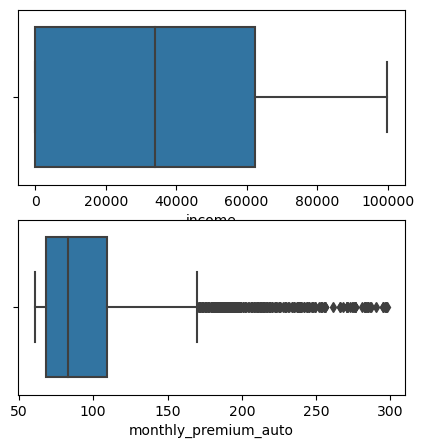

In [21]:
fig, ax = plt.subplots(2, figsize=(5,5))
sns.boxplot(data = marketing_customer_df, x='income', ax=ax[0])
sns.boxplot(data = marketing_customer_df, x='monthly_premium_auto', ax=ax[1])
plt.show()

- `income` doesn't seem to have any outliers
- `monthly_premium_auto` does have outliers. you can see a few isolated spots on the right beyond the upper wisker.

Lets have another look again on the scatterplots of the two variables:

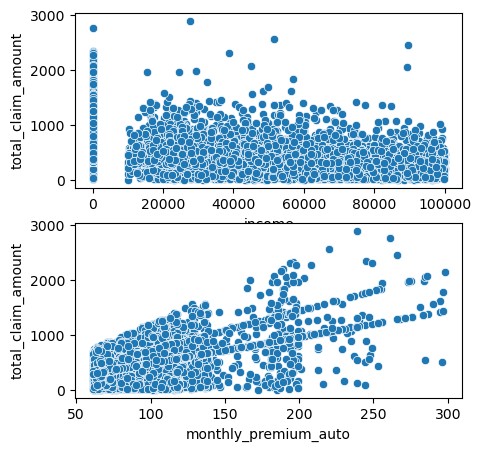

In [22]:
fig, ax = plt.subplots(2, figsize=(5,5))
sns.scatterplot(data = marketing_customer_df, x='income', y='total_claim_amount', ax=ax[0])
sns.scatterplot(data = marketing_customer_df, x='monthly_premium_auto', y='total_claim_amount', ax=ax[1])
plt.show()

- `income` shows a lot of spots on x=0. I will investigate on that further if it makes sense to drop this rows as well or replace it with the mean.
- `monthly_premium_auto` seems to have 2-3 linear distributions and many outliers

In [23]:
marketing_customer_df[(marketing_customer_df['income']==0) & (marketing_customer_df['employmentstatus']!= "Unemployed")]

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size


In [24]:
marketing_customer_df[(marketing_customer_df['income']!=0) & (marketing_customer_df['employmentstatus']== "Unemployed")]

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size


#### Removing outliers

In [25]:
numerical_df[selected_numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
income,9134.0,37657.380009,30379.904734,0.0,0.0,33889.5,62320.0,99981.0
monthly_premium_auto,9134.0,93.219291,34.407967,61.0,68.0,83.0,109.0,298.0


As all values of `monthly_premium_auto` are feasable in real life, I would like to not remove them. 
However, one procedure of performing the outlier removing can be seen below.
`Income` remains untouched for as the customers with income = 0 are those that are unemployed.

In [26]:
#iqr = np.percentile(marketing_customer_df['monthly_premium_auto'],75) - np.percentile(marketing_customer_df['monthly_premium_auto'],25)
#lower_wisker = np.percentile(marketing_customer_df['monthly_premium_auto'],25) - 1.5*iqr
#upper_wisker = np.percentile(marketing_customer_df['monthly_premium_auto'],75) + 1.5*iqr

In [27]:
marketing_customer_df.shape

(9134, 24)

In [28]:
# Filtering the dataframe so that everything below lower whisker and above upper whisker will be cut off.
# Storing this in a new df called model_df
# model_df = marketing_customer_df[(marketing_customer_df['monthly_premium_auto']>lower_wisker) & (marketing_customer_df['monthly_premium_auto']<upper_wisker)]
# continue without removing outliers
model_df = marketing_customer_df

In [29]:
model_df.shape

(9134, 24)

Let's check visualize `monthly_premium_auto` again after removing the outliers:

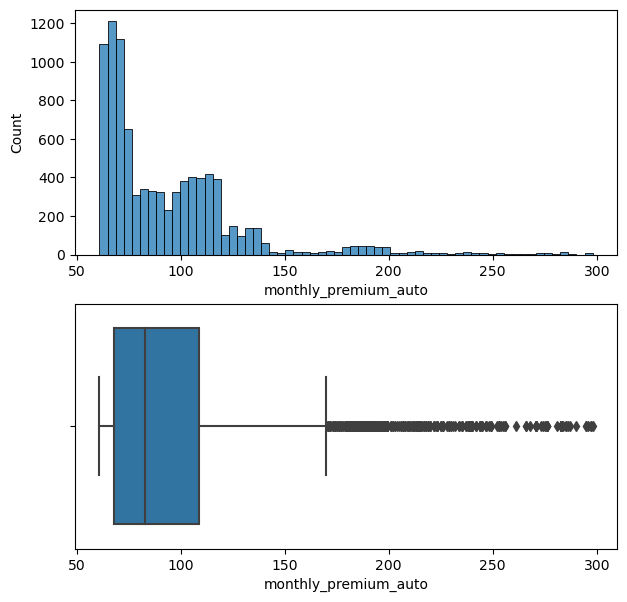

In [30]:
fig, ax = plt.subplots(2, figsize=(7,7))
sns.histplot(model_df['monthly_premium_auto'], ax=ax[0])
sns.boxplot(model_df, x='monthly_premium_auto',ax=ax[1])
plt.show()

### X-y split

I already removed customer ID not suited for neither the OneHotEncoder nor the ordinal transformation.
Also, I will leave out the date column for now even if it could have great potential for the model.


In [31]:
categoricals

['state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

#### Deciding on X and y

In [32]:
# X will be first all categorical columns as well as the two preselected numerical columns that correlate with y
X = model_df[list(selected_numerical) + list(categoricals)]
y = model_df['total_claim_amount']

In [33]:
X.head(2)

,income,monthly_premium_auto,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,56274,69,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,0,94,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize


#### Splitting the Dataframe into train and test

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

4 new sets were created but the column names were lost.
Use the pd.DataFrame() function to create new Pandas DataFrames from the X_train, and X_test Numpy arrays obtained in the previous step (make sure to use the columns= option to set the columns names to X.columns).

In [35]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

Split the X_train Pandas DataFrame into two: numerical, and categorical using df.select_dtypes()

In [36]:
X_train_num_df = X_train_df[selected_numerical]
X_train_cat_df = X_train_df[categoricals]

X_test_num_df = X_test_df[selected_numerical]
X_test_cat_df = X_test_df[categoricals]

In [37]:
X_train_num_df.head()

,income,monthly_premium_auto
4197,0,73
306,0,116
6895,88362,78
7503,34807,73
7181,0,92


In [38]:
X_train_cat_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
4197,Arizona,No,Basic,Bachelor,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer4,Web,Four-Door Car,Medsize
306,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L1,Offer2,Call Center,SUV,Medsize
6895,Arizona,No,Extended,College,Employed,M,Suburban,Single,Personal Auto,Personal L1,Offer2,Call Center,Two-Door Car,Medsize
7503,Oregon,No,Basic,High School or Below,Employed,F,Suburban,Single,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Small
7181,Oregon,No,Extended,High School or Below,Unemployed,M,Suburban,Married,Personal Auto,Personal L2,Offer1,Agent,Two-Door Car,Medsize


#### Transforming the numerical columns

In [39]:
from sklearn.preprocessing import MinMaxScaler
import os
import pickle

scaler = MinMaxScaler()

scaler.fit(X_train_num_df)

path = "transformers/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

scaler_file_name = "min_max_scaler.pkl"    
with open(path + scaler_file_name, "wb") as file:
    pickle.dump(scaler, file)

If you used a transformer/scaler in the previous step, create new Pandas DataFrames from the Numpy arrays generated by the .transform() using the pd.DataFrame() function as you did earlier with the Numpy arrays generated by the train_test_split() function.

In [40]:
X_train_num_scaled = scaler.transform(X_train_num_df)
X_test_num_scaled = scaler.transform(X_test_num_df)

X_train_num_scaled_df = pd.DataFrame(X_train_num_scaled, columns=X_train_num_df.columns)
X_test_num_scaled_df  = pd.DataFrame(X_test_num_scaled,  columns=X_test_num_df.columns)

X_train_num_scaled_df.head()

,income,monthly_premium_auto
0,0.000000,0.052402
1,0.000000,0.240175
2,0.883788,0.074236
3,0.348136,0.052402
4,0.000000,0.135371


In [41]:
X_train_num_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
income,6393.0,0.375961,0.302589,0.0,0.000000,0.338774,0.622698,1.0
monthly_premium_auto,6393.0,0.139661,0.146747,0.0,0.030568,0.096070,0.209607,1.0


#### Transform the categorical columns into numbers using a:
- OneHotEncoder for categorical nominal columns. (again only use the .fit() in the Train set, but the .transform() in the Train and the Test sets)
- Remember to save all your transformers/scalers right after the .fit() using pickle using the code shown below.
- Use .replace() to cast into numbers any categorical ordinal column replacing each label with a number that: respects the order of the labels and the relative "distance"

In [42]:
X_train_cat_columns = list(X_train_cat_df.columns)

In [43]:
ordinal_categoricals = ['coverage', 'education', 'vehicle_class','vehicle_size']
nominal_categoricals = ['state', 'response', 'employmentstatus', 'gender', 'location_code', 'marital_status', 
                        'policy_type', 'policy','renew_offer_type','sales_channel']

In [44]:
from sklearn.preprocessing import OrdinalEncoder

o_encoder = OrdinalEncoder()

# perform encoding
X_train_cat_encoded = o_encoder.fit_transform(X_train_cat_df[ordinal_categoricals])

path = "transformers/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "ordinal_encoder.pkl" # Use a descriptive name for your scaler/transformer but keep the ".pkl" file extension
with open(path+filename, "wb") as file:
    pickle.dump(o_encoder, file)

In [45]:
X_test_cat_encoded = o_encoder.transform(X_test_cat_df[ordinal_categoricals])

In [46]:
X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=ordinal_categoricals).reset_index().drop(columns='index')
X_test_cat_encoded_df  = pd.DataFrame(X_test_cat_encoded, columns=ordinal_categoricals).reset_index().drop(columns='index')

In [47]:
from sklearn.preprocessing import OneHotEncoder
import os

# Create an instance of OneHotEncoder
ohe_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

# perform one-hot encoding
X_train_cat_encoded2 = ohe_encoder.fit_transform(X_train_cat_df[nominal_categoricals])

path = "transformers/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "one_hot_encode.pkl" # Use a descriptive name for your scaler/transformer but keep the ".pkl" file extension
with open(path+filename, "wb") as file:
    pickle.dump(ohe_encoder, file) # Replace "variable" with the name of the variable that contains your transformer

In [48]:
X_test_cat_encoded2 = ohe_encoder.transform(X_test_cat_df[nominal_categoricals])

In [49]:
X_train_cat_encoded2_df = pd.DataFrame(X_train_cat_encoded2).reset_index().drop(columns='index')
X_test_cat_encoded2_df  = pd.DataFrame(X_test_cat_encoded2).reset_index().drop(columns='index')

In [50]:
X_train_cat_df.reset_index(inplace=True)
X_test_cat_df.reset_index(inplace=True)

In [51]:
print(X_train_cat_encoded_df.shape)
print(X_train_cat_df.shape)
print(X_test_cat_encoded_df.shape)
print(X_test_cat_df.shape)

(6393, 4)
(6393, 15)
(2741, 4)
(2741, 15)


In [53]:
X_train_cat_df2 = pd.concat([X_train_cat_encoded_df, X_train_cat_encoded2_df], axis=1)
X_test_cat_df2 = pd.concat([X_test_cat_encoded_df, X_test_cat_encoded2_df], axis=1)

In [54]:
# concat numerical scaled df and categorical encoded df in both, train and test
X_train_num_cat_scaled_df = pd.concat([X_train_num_scaled_df, X_train_cat_df2], axis=1)
X_test_num_cat_scaled_df = pd.concat([X_test_num_scaled_df, X_test_cat_df2], axis=1)

In [55]:
X_train_num_cat_scaled_df

,income,monthly_premium_auto,coverage,education,vehicle_class,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,...,policy_Special L2,policy_Special L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,0.000000,0.052402,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.240175,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.883788,0.074236,1.0,1.0,5.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.348136,0.052402,0.0,3.0,5.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000000,0.135371,1.0,3.0,5.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6388,0.000000,0.065502,1.0,1.0,5.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6389,0.000000,0.013100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6390,0.269951,0.017467,0.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6391,0.222242,0.192140,0.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [58]:
X_train_num_cat_scaled_df.describe()

,income,monthly_premium_auto,coverage,education,vehicle_class,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,...,policy_Special L2,policy_Special L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
count,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,...,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000
mean,0.375961,0.139661,0.483967,1.549507,1.888628,1.086814,0.186298,0.344596,0.096355,0.283591,...,0.016268,0.016424,0.408259,0.319881,0.158298,0.113562,0.373846,0.283904,0.193962,0.148287
std,0.302589,0.146747,0.654794,1.382812,2.070741,0.535770,0.389377,0.475273,0.295101,0.450776,...,0.126513,0.127110,0.491550,0.466467,0.365049,0.317303,0.483861,0.450926,0.395431,0.355412
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030568,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.338774,0.096070,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.622698,0.209607,1.000000,3.000000,4.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,2.000000,4.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Perform another MinMaxScaler on all columns
Some of the ordinal categorical columns have a range outside [0,1]

In [59]:
from sklearn.preprocessing import MinMaxScaler
import os
import pickle

scaler2 = MinMaxScaler()

scaler2.fit(X_train_num_cat_scaled_df)

path = "transformers/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

scaler_file_name = "min_max_scaler2_num_cat.pkl"    
with open(path + scaler_file_name, "wb") as file:
    pickle.dump(scaler2, file)

In [60]:
X_train_final_scaled = scaler2.transform(X_train_num_cat_scaled_df)
X_test_final_scaled = scaler2.transform(X_test_num_cat_scaled_df)

X_train_final_scaled_df = pd.DataFrame(X_train_final_scaled, columns=X_train_num_cat_scaled_df.columns)
X_test_final_scaled_df  = pd.DataFrame(X_test_final_scaled,  columns=X_test_num_cat_scaled_df.columns)

X_train_final_scaled_df.head()

,income,monthly_premium_auto,coverage,education,vehicle_class,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,...,policy_Special L2,policy_Special L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,0.000000,0.052402,0.0,0.00,0.0,0.5,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.240175,0.0,0.00,0.6,0.5,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.883788,0.074236,0.5,0.25,1.0,0.5,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.348136,0.052402,0.0,0.75,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000000,0.135371,0.5,0.75,1.0,0.5,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Applying linear regression

In [61]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train_final_scaled_df, y_train) # If we has to transform y_train, we will use .fit(X_train_scaled_df, y_train_transformed)

path = "models/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")
        
    filename = "linear_model.pkl" # use a descriptive name for your encoder but keep the ".pkl" file extension
    with open(path+filename, "wb") as file:
        pickle.dump(linear_model, file) # Replace "variable" with the name of the variable that contains your transformer

In [62]:
y_train_pred = linear_model.predict(X_train_final_scaled_df)
y_test_pred = linear_model.predict(X_test_final_scaled_df)

In [63]:
results = {'Set': ['Train']*X_train_final_scaled_df.shape[0] + ['Test']*X_test_final_scaled_df.shape[0],
          "Real": list(y_train) + list(y_test),
           'Predicted': list(y_train_pred) + list(y_test_pred)}

In [64]:
results_df = pd.DataFrame(results)
results_df['Errors'] = results_df['Real'] - results_df['Predicted']
results_df.head()

,Set,Real,Predicted,Errors
0,Train,525.600000,549.0,-23.400000
1,Train,830.623064,718.0,112.623064
2,Train,452.599718,489.0,-36.400282
3,Train,472.043042,453.5,18.543042
4,Train,441.600000,554.5,-112.900000


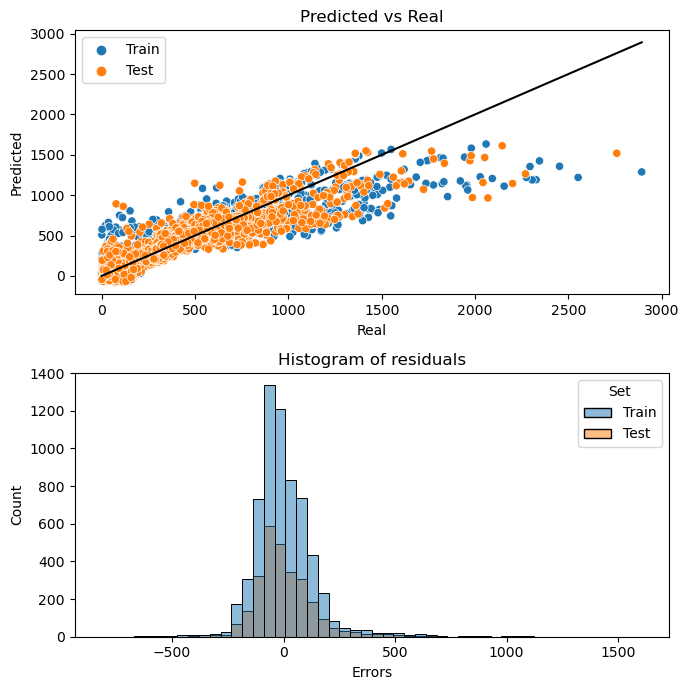

In [65]:
fig, ax = plt.subplots(2,1, figsize=(7,7))

sns.scatterplot(results_df, x="Real", y="Predicted", hue="Set", ax=ax[0])
sns.lineplot(results_df, x="Real", y="Real", color="black", ax=ax[0])
ax[0].set_title("Predicted vs Real")

sns.histplot(results_df, x="Errors", bins=50, hue="Set", ax=ax[1])
ax[1].set_title("Histogram of residuals")

plt.tight_layout()
plt.show()

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def error_metrics_report(y_real_train: list, y_real_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
    '''
    Performing error metrics based on real and predicted data for both sets, train & test.
    Input: Lists of y_real & y_pred values for both sets,
    Output: Data Frame that summarizes the error metrics for both set.
    '''

    MAE_train = mean_absolute_error(y_real_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_real_test, y_pred_test)

    # Mean squared error
    MSE_train = mean_squared_error(y_real_train, y_pred_train)
    MSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # Root mean squared error
    RMSE_train = mean_squared_error(y_real_train, y_pred_train, squared=False)
    RMSE_test  = mean_squared_error(y_real_test, y_pred_test, squared=False)

    # R2
    R2_train = r2_score(y_real_train, y_pred_train)
    R2_test  = r2_score(y_real_test, y_pred_test)

    results = {"Metric": ["MAE","MSE", "RMSE","R2"], 
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    return results_df

In [67]:
error_metrics_report(list(results_df[results_df["Set"]=="Train"]["Real"]),
                     list(results_df[results_df["Set"]=="Test"]["Real"]),
                     list(results_df[results_df["Set"]=="Train"]["Predicted"]),
                     list(results_df[results_df["Set"]=="Test"]["Predicted"]))

,Metric,Train,Test
0,MAE,94.54,97.70
1,MSE,19251.25,19699.44
2,RMSE,138.75,140.35
3,R2,0.77,0.78
